# Método apply en lugar de concatenar métodos

In [1]:
import yfinance as yf
import pandas as pd

data = yf.download('SPY', auto_adjust=True)

data['variacion'] = data['Close'].pct_change()
data.variacion.groupby(data.index.year).apply(pd.DataFrame.std)

[*********************100%***********************]  1 of 1 completed


Date
1993    0.005757
1994    0.006636
1995    0.005381
1996    0.008207
1997    0.012650
1998    0.014014
1999    0.011408
2000    0.015057
2001    0.013913
2002    0.016661
2003    0.010411
2004    0.007020
2005    0.006501
2006    0.006305
2007    0.010020
2008    0.026012
2009    0.016778
2010    0.011295
2011    0.014499
2012    0.008024
2013    0.006976
2014    0.007084
2015    0.009721
2016    0.008228
2017    0.004248
2018    0.010732
2019    0.007881
2020    0.021039
2021    0.009476
Name: variacion, dtype: float64

In [2]:
data.variacion.groupby(data.index.year).apply(pd.DataFrame.kurt)

Date
1993    3.120232
1994    1.617630
1995    1.315880
1996    1.583546
1997    5.293870
1998    4.375374
1999   -0.054982
2000    1.428967
2001    1.146124
2002    0.771296
2003    0.686423
2004   -0.091730
2005   -0.020562
2006    1.198886
2007    1.731381
2008    6.511775
2009    2.075378
2010    2.087565
2011    2.622709
2012    0.832115
2013    1.469943
2014    1.447303
2015    2.147655
2016    2.330447
2017    2.747033
2018    3.324577
2019    3.228079
2020    7.325846
2021    0.711300
Name: variacion, dtype: float64

# Ejemplos de concatenado con groupby

<AxesSubplot:xlabel='Date'>

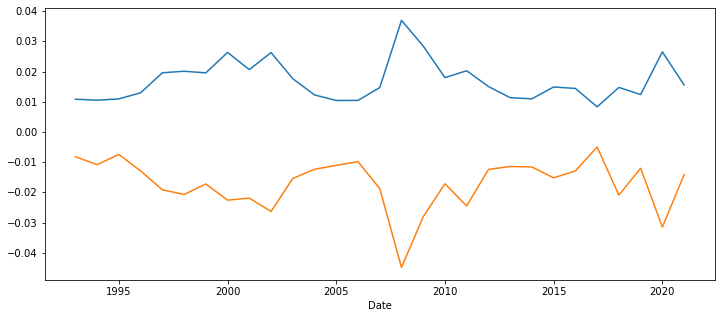

In [3]:
data.variacion.groupby(data.index.year).quantile(0.95).plot(figsize=(12,5))
data.variacion.groupby(data.index.year).quantile(0.05).plot(figsize=(12,5))

<AxesSubplot:xlabel='Date'>

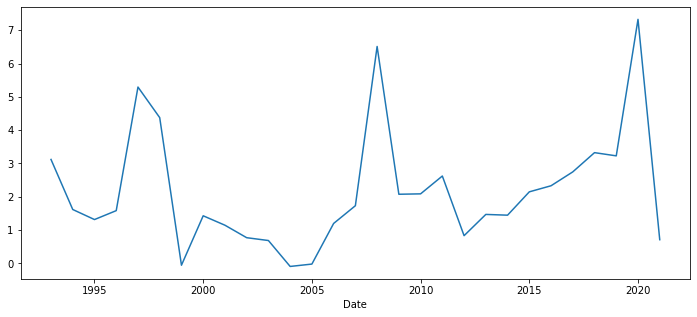

In [4]:
data.variacion.groupby(data.index.year).apply(pd.DataFrame.kurtosis).plot(figsize=(12,5))

<AxesSubplot:xlabel='Date'>

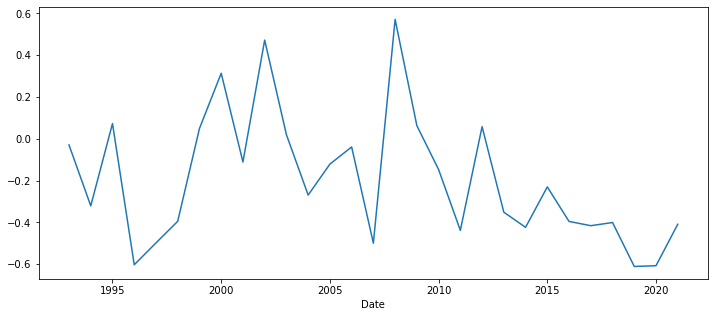

In [5]:
data.variacion.groupby(data.index.year).apply(pd.DataFrame.skew).plot(figsize=(12,5))

### Agrupamiento de booleanos y discretos (Atencion a esto)

De paso vemos el WHERE() en un dataFrame

In [6]:
data['intradiario']  = data.Close - data.Open
data['cierre_previo']=data['Close'].shift()
data['gap_positivo']=data.eval('Open>cierre_previo')

# Lo defino por default arbitrariamente
data['vela_color'] = 'Verde'  

# Ahora si pregunto, si se da la condicion dejo el default si no la cambio:
data['vela_color']= data.vela_color.where(data.Close > data.Open,"Roja")

data

,Open,High,Low,Close,Volume,variacion,intradiario,cierre_previo,gap_positivo,vela_color
Date,,,,,,,,,,
1993-01-29,25.902594,25.902594,25.773725,25.884184,1003200,NaN,-0.018410,NaN,False,Roja
1993-02-01,25.902589,26.068277,25.902589,26.068277,480500,0.007112,0.165688,25.884184,True,Verde
1993-02-02,26.049860,26.141909,25.994630,26.123499,201300,0.002118,0.073639,26.068277,False,Verde
1993-02-03,26.160321,26.418058,26.141912,26.399649,529400,0.010571,0.239327,26.123499,True,Verde
1993-02-04,26.491701,26.565340,26.197144,26.510111,531500,0.004184,0.018410,26.399649,True,Verde
...,...,...,...,...,...,...,...,...,...,...
2021-04-08,407.929993,408.579987,406.929993,408.519989,57863100,0.004747,0.589996,406.589996,True,Verde
2021-04-09,408.390015,411.670013,408.260010,411.489990,61060100,0.007270,3.099976,408.519989,False,Verde
2021-04-12,410.850006,411.929993,410.200012,411.640015,56704900,0.000365,0.790009,411.489990,False,Verde


### Agrupando por SIZE o COUNT

In [7]:
data.groupby('gap_positivo').mean().Volume

gap_positivo
False    9.160028e+07
True     7.909276e+07
Name: Volume, dtype: float64

In [8]:
data.groupby('gap_positivo').intradiario.count()

gap_positivo
False    3101
True     4002
Name: intradiario, dtype: int64

### Agrupamiendo por doble criterio >> MultiIndice

In [9]:
df_mi = data.groupby(['gap_positivo','vela_color']).size()
df_mi

gap_positivo  vela_color
False         Roja          1445
              Verde         1656
True          Roja          1948
              Verde         2054
dtype: int64

In [10]:
df_mi.loc[True,'Roja']

1948

In [11]:
df = data.groupby(['gap_positivo','vela_color']).size().reset_index(name='dato')
df

,gap_positivo,vela_color,dato
0,False,Roja,1445
1,False,Verde,1656
2,True,Roja,1948
3,True,Verde,2054


In [12]:
data.groupby(['gap_positivo','vela_color']).variacion.mean()

gap_positivo  vela_color
False         Roja         -0.011608
              Verde         0.002379
True          Roja         -0.002711
              Verde         0.010405
Name: variacion, dtype: float64

# Combinacion de Agrupamiento + Filtros + Ordenamientos

## Agrupamiento con filtros

In [13]:
data = yf.download('AAPL', auto_adjust=True)

# Calculo las variaciones
data['variaciones'] = data['Close'].pct_change()*100

# Filtramos las variaciones > 10%
filtro = data.loc[ data['variaciones'] > 10 ]  

# Contabilizamos por año ese filtro
agrupados = filtro.variaciones.groupby(filtro.index.year).count().to_frame()
agrupados.columns = ['Subas +10%']
agrupados

[*********************100%***********************]  1 of 1 completed


,Subas +10%
Date,
1982,1
1983,3
1984,1
1987,3
1990,1
1993,1
1994,3
1996,2
1997,4


## ¿Y al reves? primero agrupamiento y luego filtro? ¿cuando usar cada variante?

Ejemplo: Ver semanas con rendimiento mayor al 13% (ponele)

In [14]:
data = yf.download('AAPL', auto_adjust=True)
data['factor']=data.Close.pct_change()+1

yields = pd.DataFrame()

# Ver tema advertencias
# yields['Yield'] = (data.factor.groupby([data.index.year, data.index.week]).prod() -1)*100

yields['Yield'] = (data.factor.groupby([data.index.year, data.index.isocalendar().week]).prod() -1)*100
filtro = yields.loc[yields.Yield >13]
filtro

[*********************100%***********************]  1 of 1 completed


Yield
Date week           
1980 52    25.663652
1981 12    15.730387
     17    15.999940
     21    14.090764
     29    16.292161
     40    15.790127
     51    22.001067
1982 28    16.484525
     34    14.407383
     40    27.027825
     44    18.719798
1983 2     19.999491
     3     13.258097
     15    16.190620
     35    23.076828
     50    14.451027
1984 1     15.331043
1986 33    13.043302
1987 7     15.046601
     9     14.285596
     29    13.815759
     51    19.117780
1990 49    15.646195
1991 42    13.401832
1993 41    24.861804
1994 1     13.247781
1996 19    14.136140
     29    14.879191
1997 29    14.197305
     31    18.077217
     32    39.739156
     45    15.962867
1998 1     23.808709
     9     18.125593
     29    15.009826
1999 17    17.384439
     27    20.108159
     35    13.513509
     41    13.727554
     48    20.973138
2000 9     15.968310
     25    13.365326
     34    13.624997
     44    19.865271
2001 3     13.454281
     12    17.197551
2003 19    26.643618
2004 42    16.487451
     48    17.001988
2006 29    19.834209
2011 41    14.115717
2018 18    13.251575
2020 31    14.733046

## ¿Y Combinar agrupamiento y ordenamiento? ¿para que sirve esta combinación?

In [15]:
data = yf.download('AAPL', auto_adjust=True)
data['factor']=data.Close.pct_change()+1

yields = pd.DataFrame()
yields['Yield'] = (data.factor.groupby([data.index.year, data.index.isocalendar().week]).prod() -1)*100
ordenado = yields.sort_values("Yield", ascending=False)
ordenado.index.names = ['Año','Semana']
ordenado.head(10)

[*********************100%***********************]  1 of 1 completed


,,Yield
Año,Semana,
1997,32,39.739156
1982,40,27.027825
2003,19,26.643618
1980,52,25.663652
1993,41,24.861804
1998,1,23.808709
1983,35,23.076828
1981,51,22.001067
1999,48,20.973138


# Resampleo

Mediante el metodo resample podemos reagrupar rapidamente en funcion de diferentes timeframes una serie dada
<br><b>Es importante aclarar que para que funcione el resampleo el indice de la tabla debe ser el timestamp</b>

Las Frecuencias posibles son
* B = business day frequency
* D = calendar day frequency
* W = weekly frequency 
* M = month end frequency 
* BM = business month end frequency 
* MS = month start frequency 
* BMS = business month start frequency 
* Q = quarter end frequency 
* BQ = business quarter endfrequency 
* QS = quarter start frequency 
* BQS = business quarter start frequency 
* A = year end frequency 
* BA = business year end frequency 
* AS = year start frequency 
* BAS = business year start frequency 
* BH = business hour frequency 
* H = hourly frequency 
* T = minutely frequency 
* S = secondly frequency 
* L = milliseonds

## Jugando con la fecha de resampleo y la de la muestra.. ojo ahi

In [16]:
data = yf.download('AAPL', auto_adjust=True)

resampleada = data.resample('2W').last()
resampleada.dropna().head(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
1980-12-14,0.100922,0.101361,0.100922,0.100922,469033600
1980-12-28,0.124617,0.125055,0.124617,0.124617,55574400
1981-01-11,0.111892,0.112331,0.111892,0.111892,21504000
1981-01-25,0.115402,0.115841,0.114963,0.114963,11222400
1981-02-08,0.100922,0.101361,0.100922,0.100922,13865600
1981-02-22,0.085564,0.085564,0.085126,0.085126,24371200
1981-03-08,0.090830,0.090830,0.089952,0.089952,11603200
1981-03-22,0.090391,0.091268,0.090391,0.090391,14604800
1981-04-05,0.093024,0.093463,0.093024,0.093024,16486400


## Cierres al ultimo dia HABIL del mes de cada año

In [17]:
data = yf.download('AAPL', auto_adjust=True)

resampleada = data.resample('BM').last()
resampleada.head(12)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
1980-12-31,0.120229,0.120229,0.119790,0.119790,35750400
1981-01-30,0.100044,0.100044,0.099167,0.099167,46188800
1981-02-27,0.093024,0.093902,0.093024,0.093024,14761600
1981-03-31,0.086881,0.086881,0.086003,0.086003,15993600
1981-04-30,0.099606,0.100483,0.099606,0.099606,12611200
1981-05-29,0.116279,0.116719,0.116279,0.116279,59382400
1981-06-30,0.091707,0.091707,0.091268,0.091268,35907200
1981-07-31,0.087758,0.088197,0.087758,0.087758,10953600
1981-08-31,0.070646,0.071084,0.070646,0.070646,40947200


## Cierres cada bimestre

In [18]:
import yfinance as yf
import pandas as pd

data = yf.download('AAPL', auto_adjust=True)

cierresBimestrales = data['Close'].resample('2M').last().to_frame()
cierresBimestrales

[*********************100%***********************]  1 of 1 completed


,Close
Date,
1980-12-31,0.119790
1981-02-28,0.093024
1981-04-30,0.099606
1981-06-30,0.091268
1981-08-31,0.070646
...,...
2020-08-31,128.625549
2020-10-31,108.510361
2020-12-31,132.492020


## Trabajando con intervalos de minutos

In [19]:
data = yf.download('AAPL', interval='5m', start='2021-02-14')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2021-02-16 09:30:00-05:00,135.750000,136.009995,135.259995,135.270004,135.270004,5389815
2021-02-16 09:35:00-05:00,135.199997,135.250000,134.830002,134.929993,134.929993,2038144
2021-02-16 09:40:00-05:00,134.809998,135.100006,134.779999,134.839996,134.839996,1567778
2021-02-16 09:45:00-05:00,134.875000,135.050003,134.800003,135.050003,135.050003,1212803
2021-02-16 09:50:00-05:00,134.929993,134.989899,134.759995,134.779999,134.779999,1138911
...,...,...,...,...,...,...
2021-04-14 15:35:00-04:00,132.440002,132.470001,132.125000,132.248993,132.248993,1023349
2021-04-14 15:40:00-04:00,132.240997,132.290100,132.070007,132.220001,132.220001,949475
2021-04-14 15:45:00-04:00,132.220001,132.304993,132.010101,132.019104,132.019104,763777


In [20]:
res1 = data['Close'].resample('10T').last().to_frame()
res1.head()

,Close
Datetime,
2021-02-16 09:30:00-05:00,134.929993
2021-02-16 09:40:00-05:00,135.050003
2021-02-16 09:50:00-05:00,135.048492
2021-02-16 10:00:00-05:00,134.869995
2021-02-16 10:10:00-05:00,134.910004


In [21]:
res2 = data['Close'].resample('1D').first().to_frame()
res2.columns = ["Apertura"]
res2.head()

,Apertura
Datetime,
2021-02-16 00:00:00-05:00,135.270004
2021-02-17 00:00:00-05:00,131.574997
2021-02-18 00:00:00-05:00,129.279999
2021-02-19 00:00:00-05:00,129.770004
2021-02-20 00:00:00-05:00,NaN


## Armando una tabla de varias columnas con un resampleo

In [22]:
tabla = data['Close'].resample('D').mean().to_frame().dropna()
tabla['last'] = data['Close'].resample('D').last().to_frame()
tabla['first'] = data['Close'].resample('D').first().to_frame()

tabla.columns = ["Precio Medio","Precio Cierre",'Precio Apertura']

tabla.round(2).head()

,Precio Medio,Precio Cierre,Precio Apertura
Datetime,,,
2021-02-16 00:00:00-05:00,133.73,133.16,135.27
2021-02-17 00:00:00-05:00,130.44,130.84,131.57
2021-02-18 00:00:00-05:00,128.80,129.71,129.28
2021-02-19 00:00:00-05:00,129.68,129.85,129.77
2021-02-22 00:00:00-05:00,127.15,126.01,128.09


# Graficos superpuestos

## Ejemplo con matplotlib

In [23]:
import yfinance as yf
df = yf.download('GGAL')
df['variacion'] = df['Adj Close'].pct_change()
df['volatilidad'] = df['variacion'].rolling(250).std() * 250**0.5
df.dropna(inplace=True)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,variacion,volatilidad
Date,,,,,,,,
2001-07-23,11.920,11.98,11.11,11.24,10.585962,1151900,0.027422,0.558950
2001-07-24,11.210,11.21,10.67,10.70,10.077386,518800,-0.048043,0.560919
2001-07-25,10.500,10.69,10.23,10.55,9.936112,1405300,-0.014019,0.561062
2001-07-26,10.360,10.45,10.15,10.27,9.672406,741000,-0.026540,0.561599
2001-07-27,10.170,10.45,9.90,10.36,9.757168,2540300,0.008763,0.561355
...,...,...,...,...,...,...,...,...
2021-04-08,7.780,7.80,7.66,7.70,7.700000,264200,-0.009009,0.691411
2021-04-09,7.690,7.71,7.47,7.51,7.510000,433400,-0.024675,0.690853
2021-04-12,7.730,7.73,7.25,7.32,7.320000,547600,-0.025300,0.690127


## Escalas diferentes?

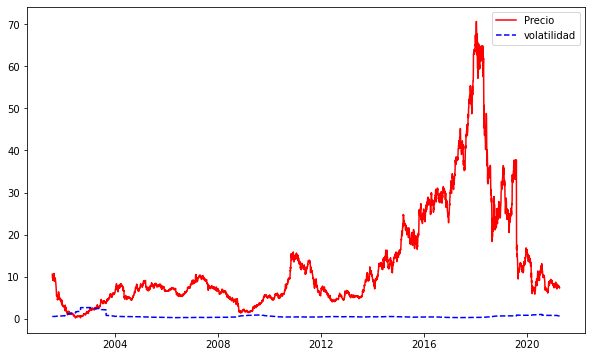

In [24]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(df['Adj Close'], 'r-', label='Precio')
ax.plot(df['volatilidad'], 'b--', label='volatilidad')

plt.legend()
plt.show()

## Escalas diferentes

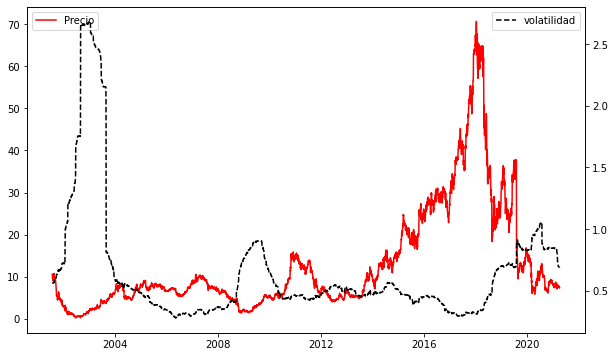

In [25]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(df['Adj Close'], 'r-',  label='Precio')
ax.legend(loc='upper left')

ax2 = ax.twinx()
ax2.plot(df['volatilidad'], 'k--',  label='volatilidad')
ax2.legend(loc='upper right')

ax2.legend()

plt.show()


## Escalas lineales y logaritmicas juntas

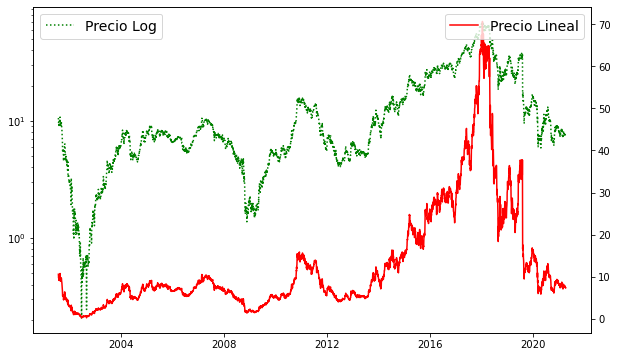

In [26]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(df['Adj Close'], 'g:',label='Precio Log')
ax.set_yscale('log')
ax.legend(loc='upper left', fontsize=14)

ax2 = ax.twinx()
ax2.plot(df['Adj Close'], 'r-',label='Precio Lineal')
ax2.legend(loc='upper right', fontsize=14)

plt.show()

## Seteo de escalas de eje xlim/ylim

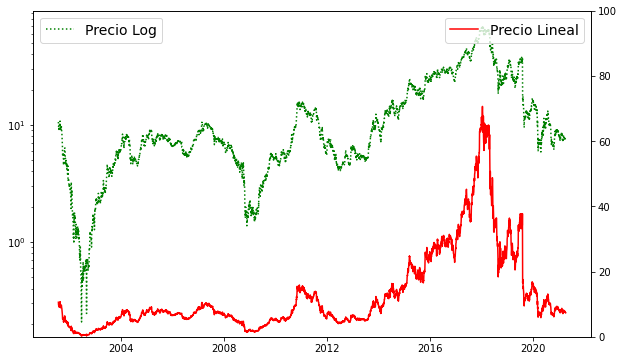

In [27]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(df['Adj Close'], 'g:',label='Precio Log')
ax.set_yscale('log')
ax.legend(loc='upper left', fontsize=14)

ax2 = ax.twinx()
ax2.plot(df['Adj Close'], 'r-',label='Precio Lineal')
ax2.set_ylim(0,100)
ax2.legend(loc='upper right', fontsize=14)

plt.show()

# Subplots

In [28]:
data = yf.download('GGAL', auto_adjust=True)

[*********************100%***********************]  1 of 1 completed


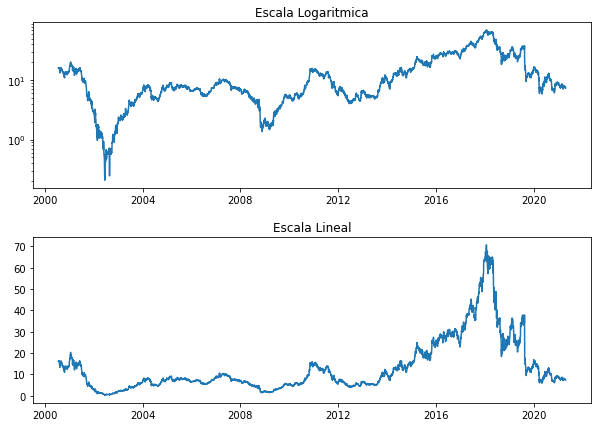

In [29]:
fig, axs = plt.subplots(2, figsize=(10,7))

axs[0].plot(data.Close)
axs[0].set_yscale('log')
axs[0].title.set_text('Escala Logaritmica')

axs[1].plot(data.Close)
axs[1].set_yscale('linear')
axs[1].title.set_text('Escala Lineal')
fig.subplots_adjust(hspace=0.3)

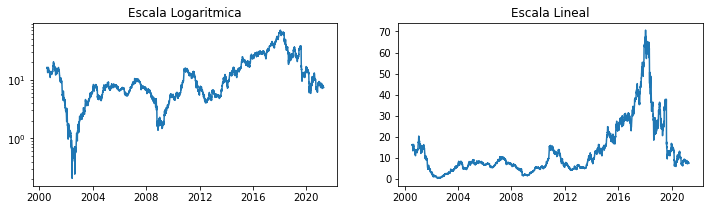

In [30]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,3))
axs[0].plot(data.Close)
axs[0].set_yscale('log')
axs[0].title.set_text('Escala Logaritmica')

axs[1].plot(data.Close)
axs[1].set_yscale('linear')
axs[1].title.set_text('Escala Lineal')
fig.subplots_adjust(hspace=0.4)

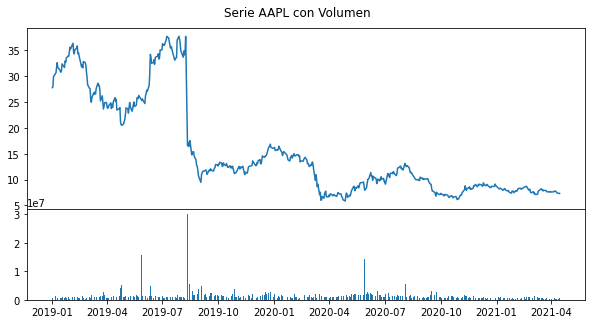

In [31]:
precios2020 = data.loc[(data.index>='2019')]

fig, axs = plt.subplots(2, figsize=(10,5), gridspec_kw={'height_ratios':[2, 1]})
fig.suptitle('Serie AAPL con Volumen', y= 0.94)

axs[0].plot(precios2020.index, precios2020.Close)
axs[1].bar(precios2020.index, precios2020.Volume)
fig.subplots_adjust(hspace=0)

# Estilos predeterminados

In [32]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


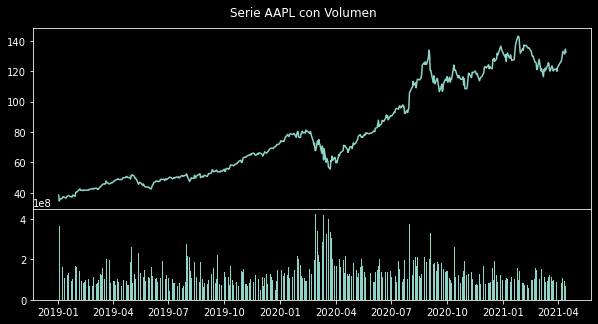

In [2]:
plt.style.use('dark_background')

precios2020 = data.loc[(data.index>='2019')]

fig, axs = plt.subplots(2, figsize=(10,5), gridspec_kw={'height_ratios':[2, 1]})
fig.suptitle('Serie AAPL con Volumen', y= 0.94)

axs[0].plot(precios2020.index, precios2020.Close)
axs[1].bar(precios2020.index, precios2020.Volume)
fig.subplots_adjust(hspace=0)

# Parámetros Estadísticos

In [33]:
df = yf.download('AAPL', auto_adjust='true', start='2001-01-01')
df['variacion'] = df.Close.pct_change()*100

volatilidad = df.variacion.groupby(df.index.year).std() * 250**0.5
skew = df.variacion.groupby(df.index.year).skew()
kurtosis= df.variacion.groupby(df.index.year).apply(pd.DataFrame.kurtosis)

parametros = pd.concat([volatilidad,skew,kurtosis], axis=1)
parametros.columns = ['volatilidad','skew','kurtosis']

parametros = parametros.dropna().round(2)
parametros

[*********************100%***********************]  1 of 1 completed


,volatilidad,skew,kurtosis
Date,,,
2001,62.32,0.15,1.49
2002,48.27,-0.37,2.79
2003,36.93,0.43,2.49
2004,40.27,1.30,4.55
2005,38.70,-0.00,1.42
2006,38.37,0.84,2.54
2007,37.56,0.06,2.18
2008,57.97,-0.16,2.79
2009,33.79,0.29,0.58


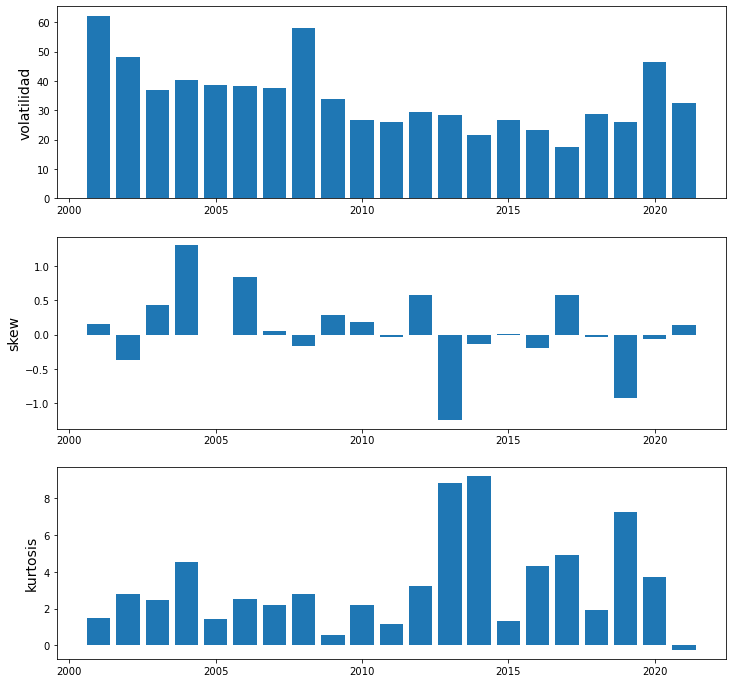

In [34]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,12), nrows=3)

claves = ['volatilidad','skew','kurtosis']
for i in range(len(claves)):
    ax[i].bar(parametros.index, parametros[claves[i]])
    ax[i].set_ylabel(claves[i], fontsize=14)

plt.show()

## Independencia Kurtosis/Volatilidad

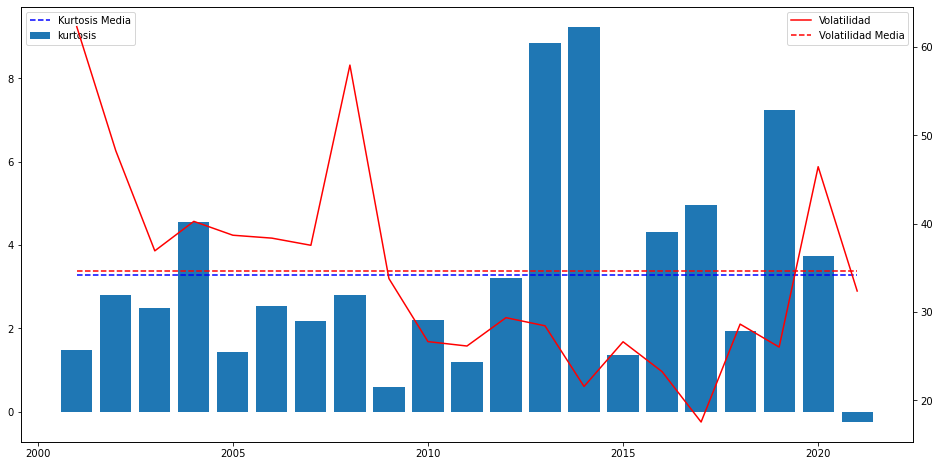

In [35]:
fig, ax = plt.subplots(figsize=(16,8))

ax.bar(parametros.index, parametros['kurtosis'], label='kurtosis')
ax.plot(parametros.index, [parametros['kurtosis'].mean()]*len(parametros), 'b--', label='Kurtosis Media')
ax2 = ax.twinx()
ax2.plot(parametros['volatilidad'], color='red', label='Volatilidad')
ax2.plot(parametros.index, [parametros['volatilidad'].mean()]*len(parametros), 'r--', label='Volatilidad Media')

ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

## En un rolling view

In [36]:
df = yf.download('AAPL', auto_adjust='true', start='2001-01-01')
df['variacion'] = df.Close.pct_change()*100

n=250
df['roll_vol'] = df.variacion.rolling(n).std() * 250**0.5
df['roll_kurt'] = df.variacion.rolling(n).apply(pd.DataFrame.kurtosis) 
df = df.dropna().round(2)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume,variacion,roll_vol,roll_kurt
Date,,,,,,,,
2002-01-04,0.36,0.37,0.35,0.36,409976000,0.47,62.26,1.48
2002-01-07,0.36,0.37,0.35,0.35,444584000,-3.33,61.58,1.52
2002-01-08,0.35,0.35,0.35,0.35,450038400,-1.27,61.46,1.55
2002-01-09,0.35,0.35,0.33,0.33,327835200,-4.25,61.48,1.55
2002-01-10,0.33,0.33,0.31,0.33,452737600,-1.94,61.51,1.54
...,...,...,...,...,...,...,...,...
2021-04-08,128.95,130.39,128.52,130.36,88844600,1.92,35.65,1.97
2021-04-09,129.80,133.04,129.47,133.00,106513800,2.03,35.65,1.96
2021-04-12,132.52,132.85,130.63,131.24,91420000,-1.32,35.37,2.05


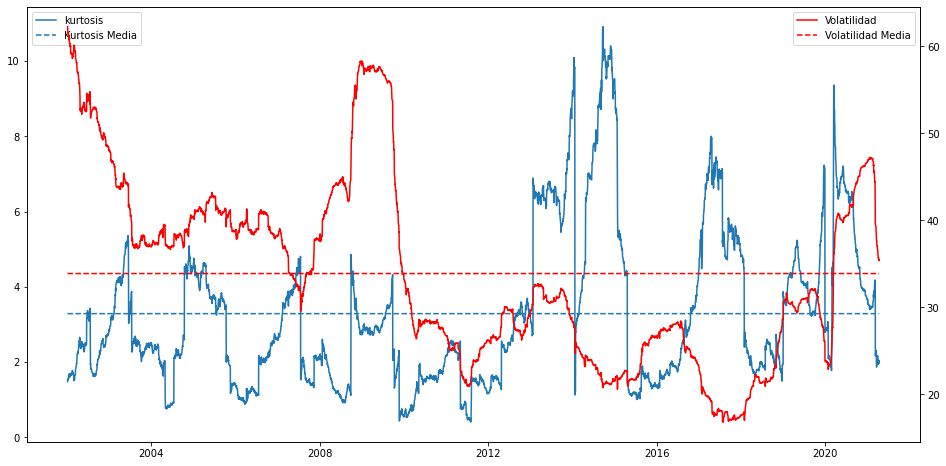

In [37]:
fig, ax = plt.subplots(figsize=(16,8))

ax.plot(df['roll_kurt'], c='tab:blue', label='kurtosis')
ax.plot(df.index, [df['roll_kurt'].mean()]*len(df), c='tab:blue', ls='--', label='Kurtosis Media')
ax2 = ax.twinx()
ax2.plot(df['roll_vol'], color='red', label='Volatilidad')
ax2.plot(df.index, [df['roll_vol'].mean()]*len(df), 'r--', label='Volatilidad Media')

ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

## El skew

In [38]:
df = yf.download('AAPL', auto_adjust='true', start='2001-01-01')
df['variacion'] = df.Close.pct_change()*100

n = 250
df['roll_skew'] = df.variacion.rolling(n).apply(pd.DataFrame.skew)
df = df.dropna().round(2)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume,variacion,roll_skew
Date,,,,,,,
2002-01-04,0.36,0.37,0.35,0.36,409976000,0.47,0.15
2002-01-07,0.36,0.37,0.35,0.35,444584000,-3.33,0.12
2002-01-08,0.35,0.35,0.35,0.35,450038400,-1.27,0.14
2002-01-09,0.35,0.35,0.33,0.33,327835200,-4.25,0.14
2002-01-10,0.33,0.33,0.31,0.33,452737600,-1.94,0.15
...,...,...,...,...,...,...,...
2021-04-08,128.95,130.39,128.52,130.36,88844600,1.92,0.04
2021-04-09,129.80,133.04,129.47,133.00,106513800,2.03,0.04
2021-04-12,132.52,132.85,130.63,131.24,91420000,-1.32,0.03


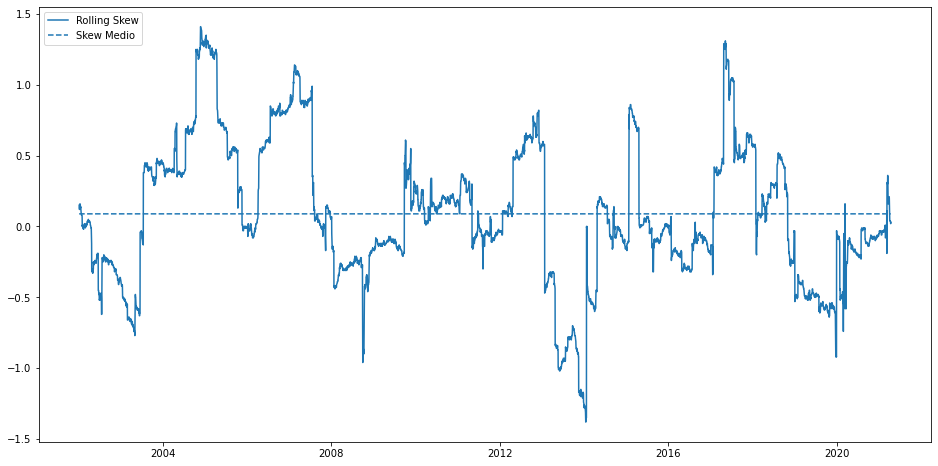

In [39]:
fig, ax = plt.subplots(figsize=(16,8))

ax.plot(df['roll_skew'], c='tab:blue', label='Rolling Skew')
ax.plot(df.index, [df['roll_skew'].mean()]*len(df), c='tab:blue', ls='--', label='Skew Medio')
ax.legend(loc='upper left')
plt.show()

## El skew, la distribucion, la media y mediana

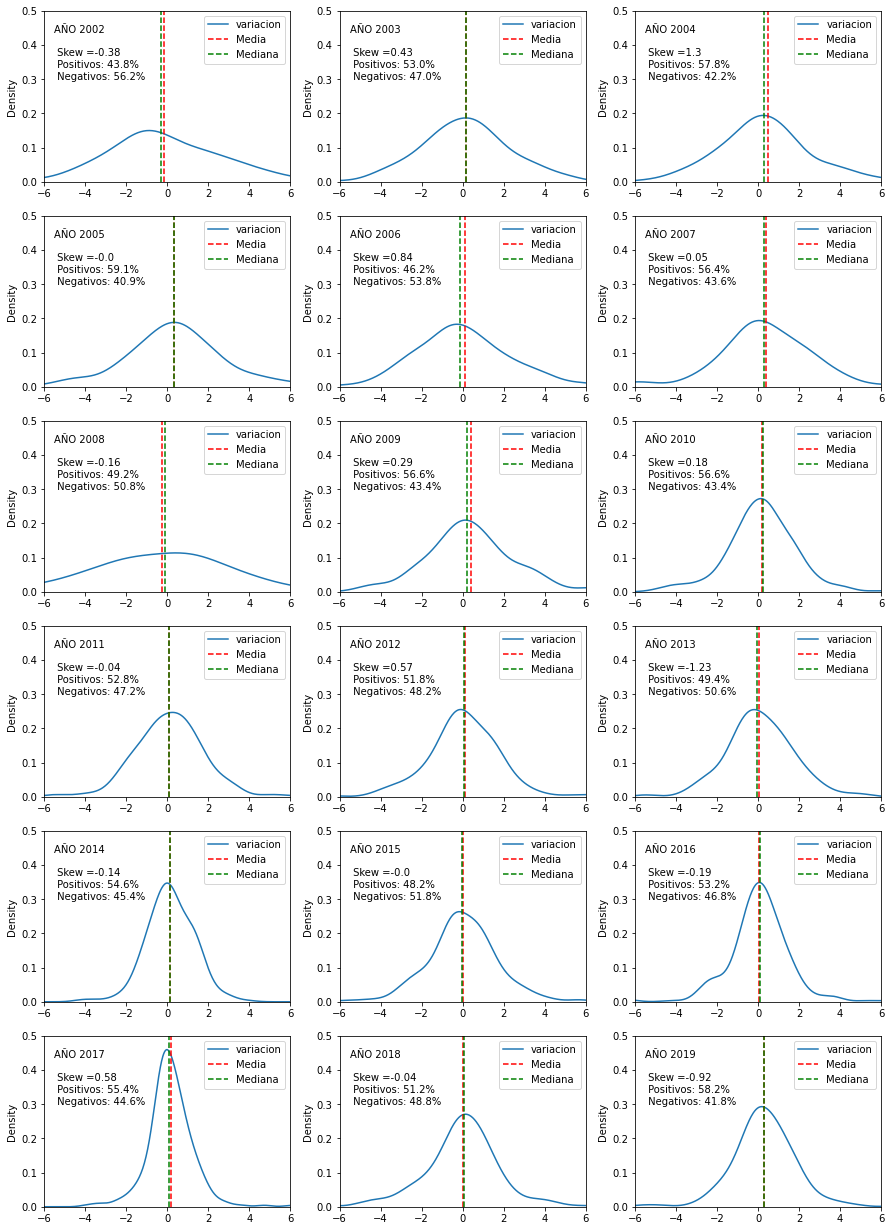

In [40]:
import datetime as dt
import matplotlib.pyplot as plt

filas= 6
columnas = 3
fig, ax = plt.subplots(figsize=(15,22), ncols=columnas, nrows=filas)

for año in range(2002,2020):
    row = (año-2002)//columnas
    col = (año-2002) % columnas
    filtro = df.loc[(df.index > dt.datetime(año,1,1))  & (df.index < dt.datetime(año,12,31))]
    ax[row][col] = filtro.variacion.plot(kind='kde', xlim=(-6,6), ylim=(0,0.5), ax=ax[row][col])
    ax[row][col].axvline(x=filtro.variacion.mean(), color='r', ls='--', label='Media')
    ax[row][col].axvline(x=filtro.variacion.median(), color='g', ls='--', label='Mediana')
    
    positivos = round(filtro.loc[filtro.variacion >= 0].variacion.count() / len(filtro) *100,1)
    negativos = round(filtro.loc[filtro.variacion < 0].variacion.count() / len(filtro) *100,1)
    skew = round(filtro.variacion.skew(),2)
    leyenda = 'AÑO '+str(año)+'\n\n Skew ='+str(skew)+'\n Positivos: '+str(positivos)+'%\n Negativos: '+str(negativos)+'%'
    ax[row][col].text(s = leyenda, y=0.3, x=-5.5)
    ax[row][col].legend(fontsize=10, loc='upper right')
plt.show()

## La Kurtosis

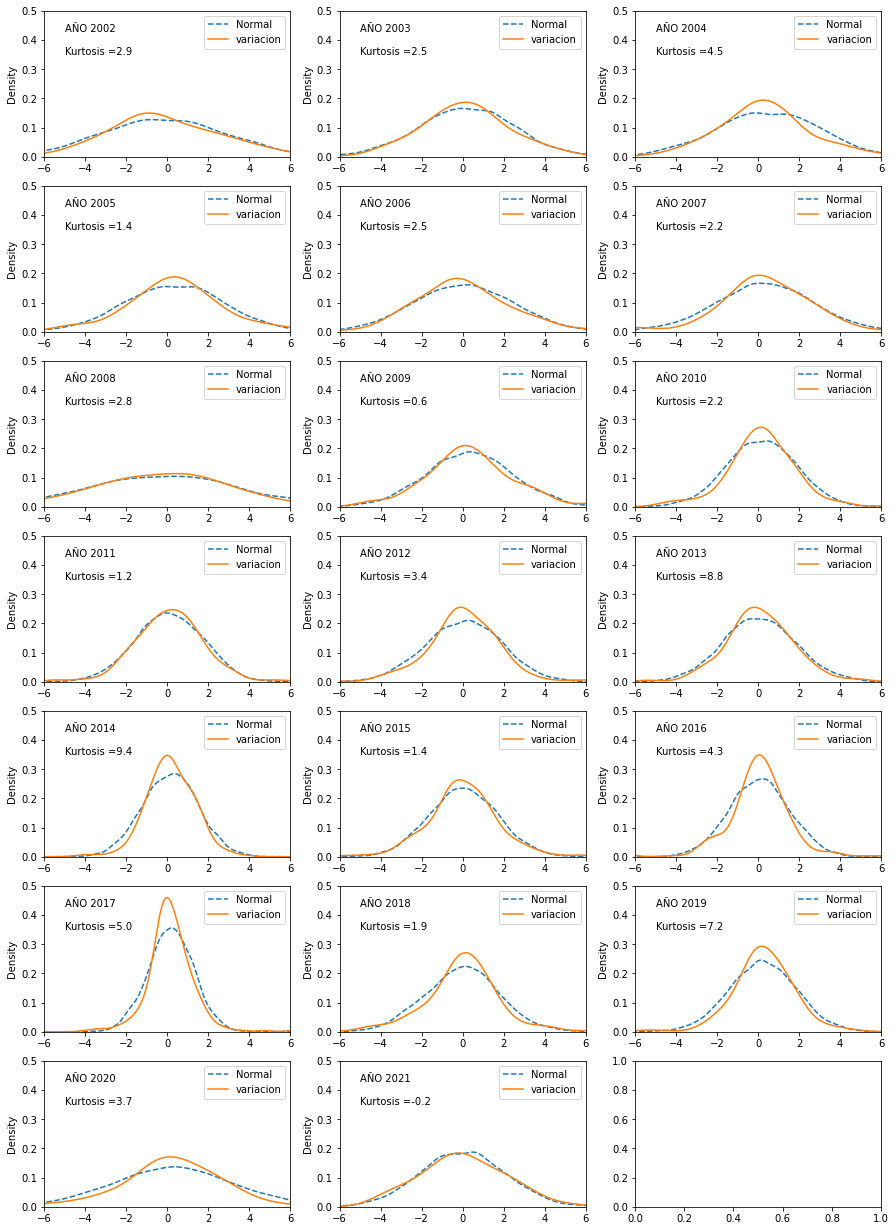

In [41]:
from scipy import stats

filas= 7
columnas = 3
fig, ax = plt.subplots(figsize=(15,22), ncols=columnas, nrows=filas)

for año in range(2002,2022):
    row = (año-2002)//columnas
    col = (año-2002)%columnas
    
    filtro = df.loc[(df.index > dt.datetime(año,1,1))  & (df.index < dt.datetime(año,12,31))]
    
    normal = stats.norm.rvs(filtro.variacion.mean(),filtro.variacion.std(),5000)
    normal_df = pd.DataFrame(normal)
    normal_df.columns = ['Normal']
    
    ax[row][col] = normal_df.plot(kind='kde', ls='--', xlim=(-6,6), ylim=(0,0.5), ax=ax[row][col])
    ax[row][col] = filtro.variacion.plot(kind='kde', xlim=(-6,6), ylim=(0,0.5), ax=ax[row][col])
    ax[row][col].text(s = 'AÑO '+str(año)+'\n\nKurtosis ='+str(round(filtro.variacion.kurtosis(),1)), y=0.35, x=-5)
    ax[row][col].legend(fontsize=10, loc='upper right')
plt.show()

In [2]:
import requests, pandas as pd, yfinance as yf

top50 = ['AAPL', 'AMZN', 'MSFT', 'BA', 'FB', 'NVDA', 'AMD', 'NFLX', 'GOOGL', 'GOOG', 'JPM', 'V', 'DIS',
         'BAC', 'INTC','MA', 'UAL', 'C', 'CRM', 'UNH', 'XOM', 'T', 'MU', 'WFC', 'JNJ', 'ADBE', 'PYPL',
         'HD', 'GILD', 'WMT', 'CSCO','PG', 'PFE', 'DAL', 'VZ', 'CVX', 'AAL', 'CMCSA', 'COST', 'QCOM',
         'BKNG', 'MRK', 'ABBV', 'BMY', 'KO', 'SBUX','MCD', 'RCL', 'AVGO', 'GS']

def getDataM(listado, start='2000-01-01', interval='1d', end=None):
    data = yf.download(listado, start=start, end=end, interval=interval, auto_adjust=True)
    return data.swaplevel(i=1, j=0, axis=1)

data_top = getDataM(top50, start='2020-01-01')

[*********************100%***********************]  50 of 50 completed


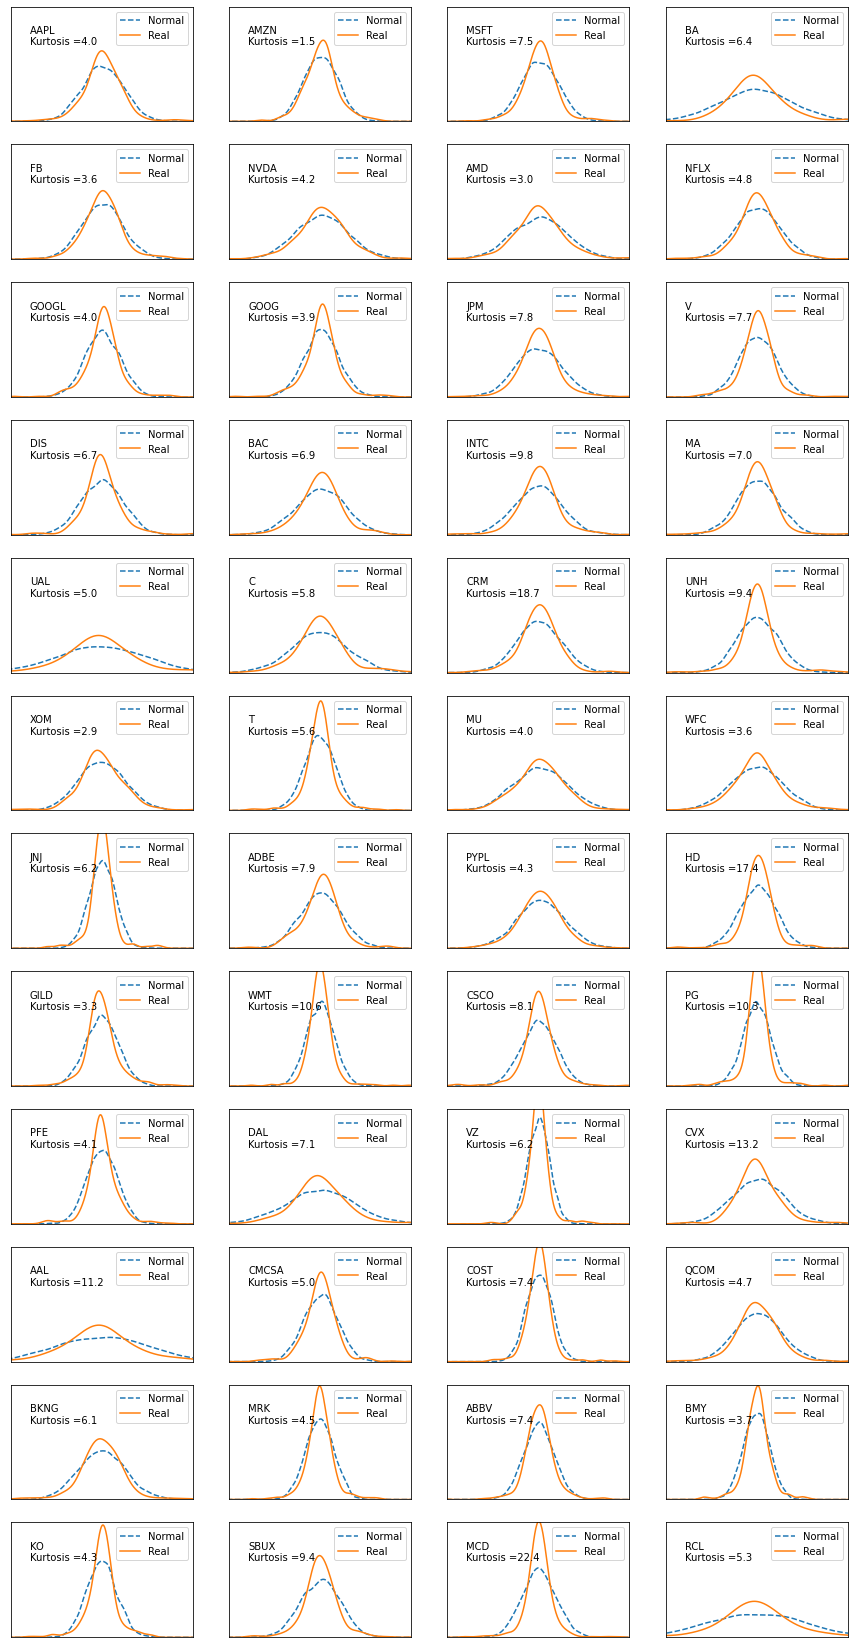

In [4]:
from scipy import stats
import matplotlib.pyplot as plt

filas= 12
columnas = 4
fig, ax = plt.subplots(figsize=(15,30), ncols=columnas, nrows=filas)

for i in range(48):
    df = data_top[top50[i]].copy()
    df['variacion'] = df.Close.pct_change()*100
    row = (i)//columnas
    col = (i)%columnas
    
    normal = stats.norm.rvs(df.variacion.mean(),df.variacion.std(),5000)
    normal_df = pd.DataFrame(normal)
    normal_df.columns = ['Normal']
    
    ax[row][col] = normal_df.plot(kind='kde', ls='--', xlim=(-12,12), ylim=(0,0.3), ax=ax[row][col])
    ax[row][col] = df.variacion.plot(kind='kde', xlim=(-12,12), ylim=(0,0.3), ax=ax[row][col], label='Real')
    ax[row][col].text(s = top50[i]+'\nKurtosis ='+str(round(df.variacion.kurtosis(),1)), y=0.2, x=-9.5)
    ax[row][col].legend(fontsize=10, loc='upper right')
    ax[row][col].set_ylabel('')
    ax[row][col].axes.xaxis.set_visible(False)
    ax[row][col].axes.yaxis.set_visible(False)
    
plt.show()

### Vemos los valores de las colas

In [44]:
data_top = getDataM(top50, start='2016-01-01')

[*********************100%***********************]  50 of 50 completed


KDE stocks mas operados sp500 vista de la curtosis en extremos de la dist. 2015-2020
Línea gris: Modelado normal con sigma y mu de la distr. real. Línea Azul: Distr real


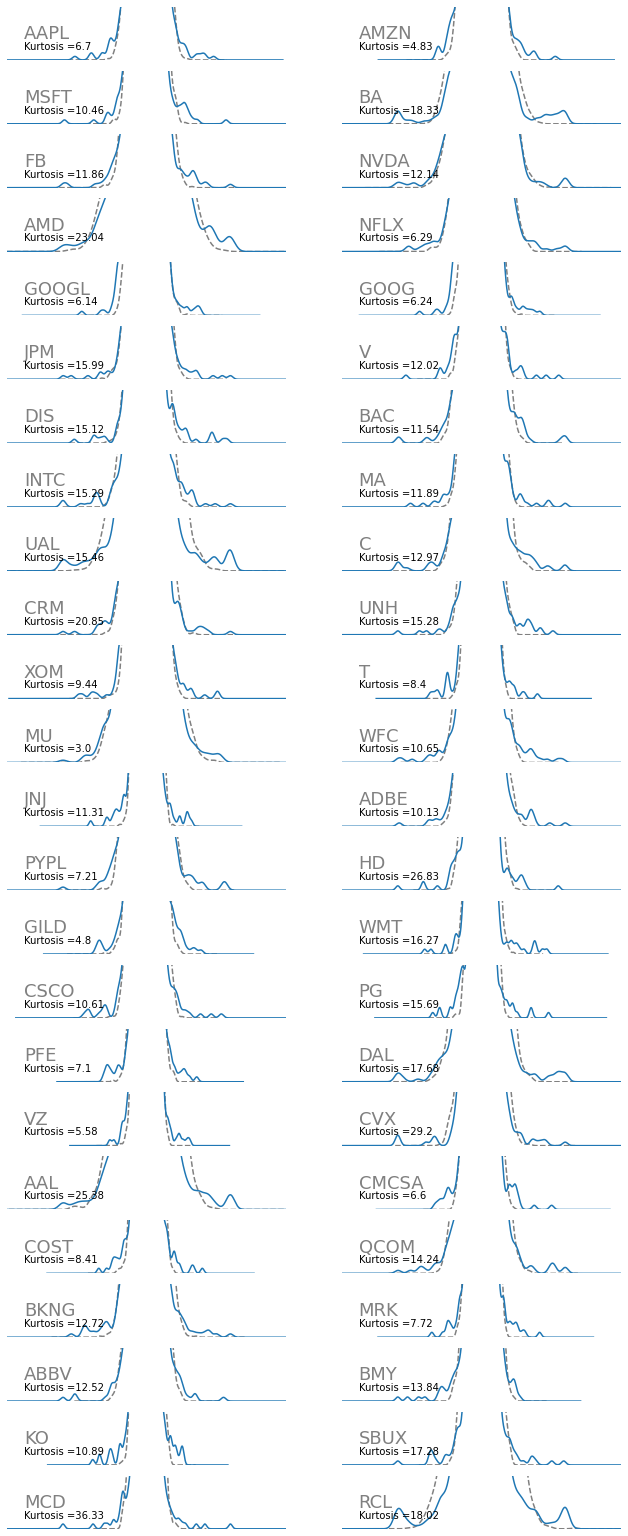

In [45]:
filas= 24
columnas = 2
fig, ax = plt.subplots(figsize=(11,28), ncols=columnas, nrows=filas)

for i in range(48):
    df = data_top[top50[i]].copy()
    df['variacion'] = df.Close.pct_change()*100
    k = round(df.variacion.kurtosis(),2)
    row = (i)//columnas
    col = (i)%columnas
    
    normal = stats.norm.rvs(df.variacion.mean(),df.variacion.std(),5000)
    normal_df = pd.DataFrame(normal)
    
    ax[row][col] = normal_df.plot(kind='kde', c='gray', ls='--', xlim=(-15,15), ylim=(0,0.01), ax=ax[row][col], legend=False)
    df['variacion'] = df['variacion'].clip(-15,15)
    ax[row][col] = df.variacion.plot(kind='kde', xlim=(-25,25), ylim=(0,0.01), ax=ax[row][col], label='Real')
    ax[row][col].text(s = top50[i], fontsize=18, y=0.004, color='gray', x=-22)
    ax[row][col].text(s = '\nKurtosis ='+str(k), fontsize=10, y=0.002, x=-22)
    ax[row][col].axes.xaxis.set_visible(False)
    ax[row][col].axes.yaxis.set_visible(False)
    ax[row][col].axis('off')

print('KDE stocks mas operados sp500 vista de la curtosis en extremos de la dist. 2015-2020')
print('Línea gris: Modelado normal con sigma y mu de la distr. real. Línea Azul: Distr real')
plt.show()